In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from pandas.plotting import scatter_matrix

In [3]:
data = pd.read_csv('austin-animal-center-shelter-outcomes-and/aac_shelter_cat_outcome_eng.csv', engine = 'python')

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black
5,2 months,A684460,Cat,domestic shorthair,brown,2014-06-02 00:00:00,2014-08-13 15:04:00,2014-08-13T15:04:00,Elsa,NaN,...,Wednesday,15,domestic shorthair,NaN,False,True,tabby,brown,NaN,brown
6,8 months,A673952,Cat,domestic shorthair,brown /white,2013-07-05 00:00:00,2014-03-06 14:29:00,2014-03-06T14:29:00,NaN,SCRP,...,Thursday,14,domestic shorthair,NaN,False,True,tabby,brown,white,brown
7,5 months,A686497,Cat,domestic shorthair,black,2014-03-22 00:00:00,2014-08-31 15:45:00,2014-08-31T15:45:00,Chester,NaN,...,Sunday,15,domestic shorthair,NaN,False,True,tabby,black,NaN,black
8,2 months,A687965,Cat,domestic shorthair,orange,2014-08-03 00:00:00,2014-10-31 18:29:00,2014-10-31T18:29:00,*Oliver,Foster,...,Friday,18,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
9,1 year,A668547,Cat,domestic mediumhair,black/white,2012-12-04 00:00:00,2013-12-16 13:59:00,2013-12-16T13:59:00,*Preston,Partner,...,Monday,13,domestic mediumhair,NaN,False,True,NaN,black,white,black


In [6]:
print(data)

      age_upon_outcome animal_id animal_type                breed  \
0              2 weeks   A684346         Cat   domestic shorthair   
1              1 month   A685067         Cat   domestic shorthair   
2             3 months   A678580         Cat   domestic shorthair   
3               1 year   A675405         Cat  domestic mediumhair   
4              3 weeks   A670420         Cat   domestic shorthair   
5             2 months   A684460         Cat   domestic shorthair   
6             8 months   A673952         Cat   domestic shorthair   
7             5 months   A686497         Cat   domestic shorthair   
8             2 months   A687965         Cat   domestic shorthair   
9               1 year   A668547         Cat  domestic mediumhair   
10            2 months   A682393         Cat              siamese   
11             2 weeks   A681039         Cat   domestic shorthair   
12            2 months   A682532         Cat   domestic shorthair   
13            3 months   A683779  

In [7]:
data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black


In [8]:
data.tail()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
29416,2 months,A758112,Cat,american shorthair,blue /white,2017-09-14 00:00:00,2017-12-10 17:44:00,2017-12-10T17:44:00,Allee Chat,NaN,...,Sunday,17,american shorthair,NaN,True,False,tabby,blue,white,blue
29417,1 month,A758569,Cat,domestic shorthair,brown /white,2017-08-03 00:00:00,2017-09-24 11:57:00,2017-09-24T11:57:00,Mia,NaN,...,Sunday,11,domestic shorthair,NaN,False,True,tabby,brown,white,brown
29418,1 year,A765938,Cat,domestic shorthair,brown,2017-01-30 00:00:00,2018-02-01 17:51:00,2018-02-01T17:51:00,NaN,Partner,...,Thursday,17,domestic shorthair,NaN,False,True,tabby,brown,NaN,brown
29419,6 months,A765832,Cat,domestic shorthair,NaN,2017-07-28 00:00:00,2018-02-01 16:37:00,2018-02-01T16:37:00,Luna,NaN,...,Thursday,16,domestic shorthair,NaN,False,True,tortie,Breed Specific,NaN,tortie
29420,6 months,A765831,Cat,domestic mediumhair,orange,2017-07-28 00:00:00,2018-02-01 16:38:00,2018-02-01T16:38:00,Mac,NaN,...,Thursday,16,domestic mediumhair,NaN,False,True,tabby,orange,NaN,orange


In [9]:
print(data.shape)
print(data.columns)

(29421, 37)
Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome', 'count', 'sex', 'Spay/Neuter',
       'Periods', 'Period Range', 'outcome_age_(days)', 'outcome_age_(years)',
       'Cat/Kitten (outcome)', 'sex_age_outcome', 'age_group', 'dob_year',
       'dob_month', 'dob_monthyear', 'outcome_month', 'outcome_year',
       'outcome_weekday', 'outcome_hour', 'breed1', 'breed2', 'cfa_breed',
       'domestic_breed', 'coat_pattern', 'color1', 'color2', 'coat'],
      dtype='object')


In [10]:
data.index

RangeIndex(start=0, stop=29421, step=1)

In [11]:
data.at[2, 'animal_type']

'Cat'

In [12]:
data['animal_type']

0        Cat
1        Cat
2        Cat
3        Cat
4        Cat
5        Cat
6        Cat
7        Cat
8        Cat
9        Cat
10       Cat
11       Cat
12       Cat
13       Cat
14       Cat
15       Cat
16       Cat
17       Cat
18       Cat
19       Cat
20       Cat
21       Cat
22       Cat
23       Cat
24       Cat
25       Cat
26       Cat
27       Cat
28       Cat
29       Cat
        ... 
29391    Cat
29392    Cat
29393    Cat
29394    Cat
29395    Cat
29396    Cat
29397    Cat
29398    Cat
29399    Cat
29400    Cat
29401    Cat
29402    Cat
29403    Cat
29404    Cat
29405    Cat
29406    Cat
29407    Cat
29408    Cat
29409    Cat
29410    Cat
29411    Cat
29412    Cat
29413    Cat
29414    Cat
29415    Cat
29416    Cat
29417    Cat
29418    Cat
29419    Cat
29420    Cat
Name: animal_type, Length: 29421, dtype: object

In [13]:
data['animal_id'][3]

'A675405'

In [14]:
data['animal_id'].dtype.name

'object'

In [15]:
data['animal_type'].dtype.name

'object'

In [16]:
type(data['animal_type'][3])

str

In [17]:
type(data['animal_id'][3])

str

In [18]:
type(data['age_upon_outcome'])

pandas.core.series.Series

In [19]:
data[['name', 'age_upon_outcome']].head()

,name,age_upon_outcome
0,NaN,2 weeks
1,Lucy,1 month
2,*Frida,3 months
3,Stella Luna,1 year
4,NaN,3 weeks


In [20]:
data.describe()

,count,Periods,Period Range,outcome_age_(days),outcome_age_(years),dob_year,dob_month,outcome_month,outcome_year,outcome_hour
count,29421.0,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000
mean,1.0,3.199347,143.199823,509.446280,1.395743,2013.982428,6.190034,7.149893,2015.361986,14.005778
std,0.0,2.601324,162.915312,966.810609,2.648796,2.965574,2.821765,3.136380,1.243294,3.863269
min,1.0,0.000000,1.000000,0.000000,0.000000,1992.000000,1.000000,1.000000,2013.000000,0.000000
25%,1.0,2.000000,30.000000,60.000000,0.164384,2013.000000,4.000000,5.000000,2014.000000,12.000000
50%,1.0,2.000000,30.000000,90.000000,0.246575,2015.000000,6.000000,7.000000,2015.000000,14.000000
75%,1.0,4.000000,365.000000,365.000000,1.000000,2016.000000,8.000000,10.000000,2016.000000,17.000000
max,1.0,22.000000,365.000000,8030.000000,22.000000,2017.000000,12.000000,12.000000,2018.000000,23.000000


In [31]:
for c in data.columns:
    print(c)
    print(data[c].unique()) 

age_upon_outcome
['2 weeks' '1 month' '3 months' '1 year' '3 weeks' '2 months' '8 months'
 '5 months' '3 years' '4 years' '2 years' '7 years' '4 weeks' '6 years'
 '4 months' '8 years' '10 years' '15 years' '10 months' '11 months'
 '6 months' '16 years' '9 months' '3 days' '6 days' '11 years' '5 weeks'
 '1 week' '5 years' '2 days' '7 months' '5 days' '9 years' '14 years'
 '13 years' '1 day' '1 weeks' '4 days' '12 years' '0 years' '17 years'
 '20 years' '18 years' '19 years' '22 years']
animal_id
['A684346' 'A685067' 'A678580' ... 'A765938' 'A765832' 'A765831']
animal_type
['Cat']
breed
['domestic shorthair' 'domestic mediumhair' 'siamese' 'russian blue'
 'domestic longhair' 'manx' 'ragdoll' 'snowshoe/domestic shorthair'
 'snowshoe' 'angora' 'himalayan' 'domestic longhair/persian'
 'japanese bobtail' 'domestic longhair/rex' 'siamese/domestic shorthair'
 'domestic mediumhair/siamese' 'maine coon' 'devon rex' 'balinese'
 'american shorthair' 'british shorthair' 'angora/persian'
 'munchkin 

In [33]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']

In [34]:
data[categorical_columns].count(axis = 0)

age_upon_outcome        29421
animal_id               29421
animal_type             29421
breed                   29421
color                   25795
date_of_birth           29421
datetime                29421
monthyear               29421
name                    16647
outcome_subtype         18641
outcome_type            29418
sex_upon_outcome        29421
sex                     29421
Spay/Neuter             29421
Cat/Kitten (outcome)    29421
sex_age_outcome         29421
age_group               29421
dob_monthyear           29421
outcome_weekday         29421
breed1                  29421
breed2                     52
coat_pattern            19155
color1                  29421
color2                  10354
coat                    29421
dtype: int64

In [35]:
data[numerical_columns].count(axis = 0)

count                  29421
Periods                29421
Period Range           29421
outcome_age_(days)     29421
outcome_age_(years)    29421
dob_year               29421
dob_month              29421
outcome_month          29421
outcome_year           29421
outcome_hour           29421
cfa_breed              29421
domestic_breed         29421
dtype: int64

In [36]:
data = data.drop('animal_type', axis = 1)\
            .drop('count', axis = 1)\
            .drop('color', axis = 1)\
            .drop('name', axis = 1)\
           .drop('outcome_subtype',    axis = 1)\
           .drop('outcome_type', axis = 1) \
            .drop('breed2', axis = 1)\
            .drop('coat_pattern', axis = 1) \
            .drop('color2', axis = 1)\
            .drop('cfa_breed', axis = 1)\
            .drop('domestic_breed', axis = 1)

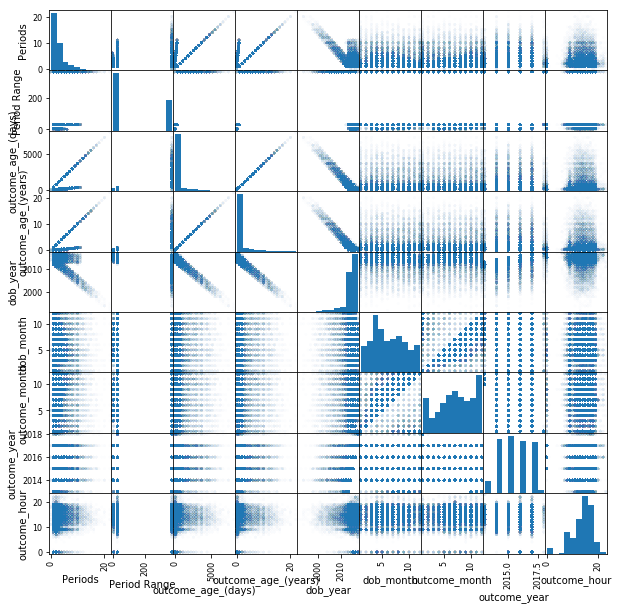

In [38]:
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

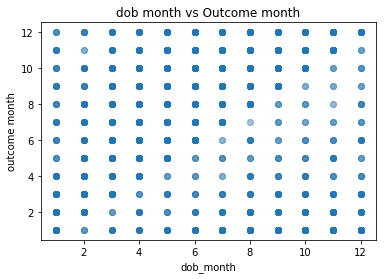

In [39]:
plt.plot(data['dob_month'], data['outcome_month'], 'o', alpha = 0.05)
plt.xlabel('dob_month')
plt.ylabel('outcome month')
plt.title('dob month vs Outcome month')
pass

In [40]:
data.corr()

,Periods,Period Range,outcome_age_(days),outcome_age_(years),dob_year,dob_month,outcome_month,outcome_year,outcome_hour
Periods,1.000000,0.121054,0.728943,0.728943,-0.658641,-0.003804,-0.037271,0.001397,-0.019485
Period Range,0.121054,1.000000,0.616551,0.616551,-0.570373,0.078339,-0.114439,0.029922,-0.112322
outcome_age_(days),0.728943,0.616551,1.000000,1.000000,-0.908309,0.057039,-0.070061,0.021534,-0.041241
outcome_age_(years),0.728943,0.616551,1.000000,1.000000,-0.908309,0.057039,-0.070061,0.021534,-0.041241
dob_year,-0.658641,-0.570373,-0.908309,-0.908309,1.000000,-0.121242,0.036670,0.386730,0.024601
dob_month,-0.003804,0.078339,0.057039,0.057039,-0.121242,1.000000,0.414236,-0.067538,-0.004631
outcome_month,-0.037271,-0.114439,-0.070061,-0.070061,0.036670,0.414236,1.000000,-0.195171,0.000781
outcome_year,0.001397,0.029922,0.021534,0.021534,0.386730,-0.067538,-0.195171,1.000000,-0.031339
outcome_hour,-0.019485,-0.112322,-0.041241,-0.041241,0.024601,-0.004631,0.000781,-0.031339,1.000000


In [30]:
data['outcome_hour'] == 14.00

0        False
1        False
2        False
3         True
4        False
5        False
6         True
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
29391    False
29392    False
29393     True
29394    False
29395    False
29396    False
29397    False
29398    False
29399     True
29400    False
29401    False
29402    False
29403    False
29404    False
29405    False
29406    False
29407    False
29408    False
29409    False
29410    False
29411    False
29412    False
29413    False
29414    False
29415     True
29416    False
29417    False
29418    False
29419    False
29420    False
Name: outcome_hour, Length: 29421, dtype: bool

In [41]:
data.head()

,age_upon_outcome,animal_id,breed,date_of_birth,datetime,monthyear,sex_upon_outcome,sex,Spay/Neuter,Periods,...,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_weekday,outcome_hour,breed1,color1,coat
0,2 weeks,A684346,domestic shorthair,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,Intact Male,Male,No,2,...,2014,7,2014-07,7,2014,Tuesday,16,domestic shorthair,orange,orange
1,1 month,A685067,domestic shorthair,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Intact Female,Female,No,1,...,2014,6,2014-08,8,2014,Thursday,18,domestic shorthair,blue,blue
2,3 months,A678580,domestic shorthair,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,Spayed Female,Female,Yes,3,...,2014,3,2014-06,6,2014,Sunday,17,domestic shorthair,white,white
3,1 year,A675405,domestic mediumhair,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Spayed Female,Female,Yes,1,...,2013,3,2014-03,3,2014,Friday,14,domestic mediumhair,black,black
4,3 weeks,A670420,domestic shorthair,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,Intact Male,Male,No,3,...,2013,12,2014-01,1,2014,Thursday,19,domestic shorthair,black,black


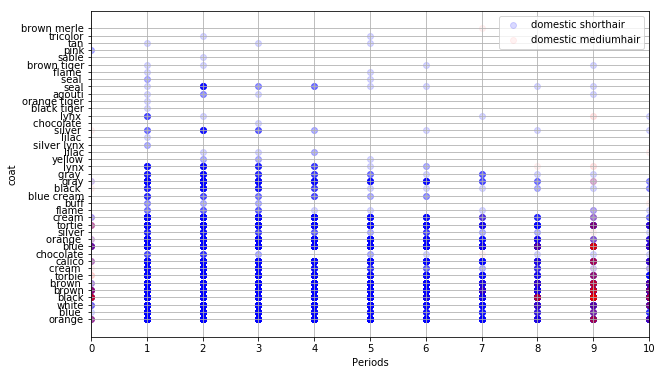

In [51]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['breed'] == 'domestic shorthair']['Periods'],
            data[data['breed'] == 'domestic shorthair']['coat'],
            alpha = 0.15,
            label = 'domestic shorthair',
            color = 'b')

plt.scatter(data[data['breed'] == 'domestic mediumhair']['outcome_hour'],
            data[data['breed'] == 'domestic mediumhair']['coat'],
            alpha = 0.05,
            label = 'domestic mediumhair',
            color = 'r')

plt.xlabel('Periods')
plt.xticks(range(11))
plt.xlim(0, 10)
plt.ylabel('coat')
plt.legend()
plt.grid()

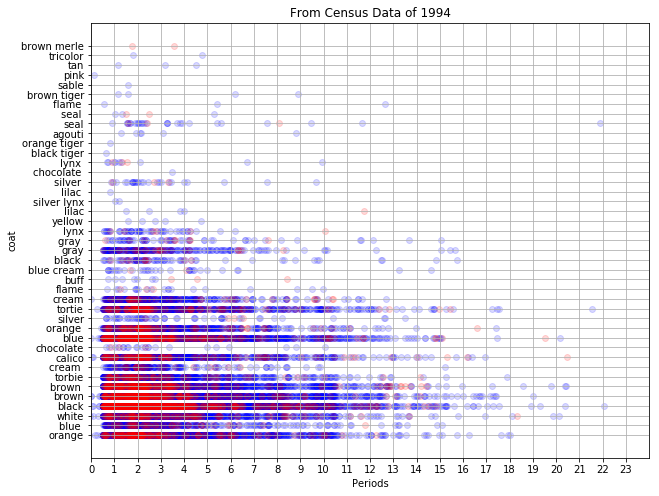

In [52]:
np.random.seed(0)
education_num_rnd = data['Periods'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data['breed'] == 'domestic shorthair'],
            data[data['breed'] == 'domestic shorthair']['coat'],
            alpha = 0.15,
            label = 'domestic shorthair',
            color = 'b')

plt.scatter(education_num_rnd[data['breed'] == 'domestic mediumhair'],
            data[data['breed'] == 'domestic mediumhair']['coat'],
            alpha = 0.15,
            label = 'domestic mediumhair',
            color = 'r')

plt.xlabel('Periods')
plt.xticks(range(24))
plt.xlim(0, 24)
plt.ylabel('coat')
plt.title('From Census Data of 1994')
plt.grid()

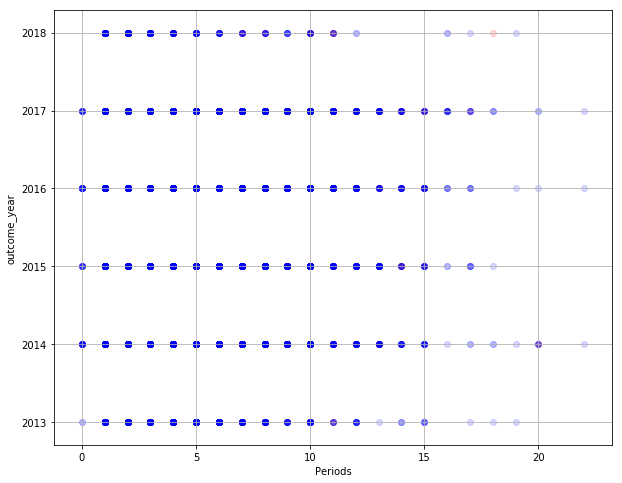

In [53]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['breed'] == 'domestic mediumhair']['Periods'],
            data[data['breed'] == 'domestic mediumhair']['outcome_year'],
            alpha = 0.15,
            label = 'domestic mediumhair',
            color = 'r')

plt.scatter(data[data['breed'] == 'domestic shorthair']['Periods'],
            data[data['breed'] == 'domestic shorthair']['outcome_year'],
            alpha = 0.15,
            label = 'domestic shorthair',
            color = 'b')

plt.xlabel('Periods')
plt.ylabel('outcome_year')
plt.grid()

In [54]:
data.describe(include = ['object'])

,age_upon_outcome,animal_id,breed,date_of_birth,datetime,monthyear,sex_upon_outcome,sex,Spay/Neuter,Cat/Kitten (outcome),sex_age_outcome,age_group,dob_monthyear,outcome_weekday,breed1,color1,coat
count,29421,29421,29421,29421,29421,29421,29421,29421,29421,29421,29421,29421,29421,29421,29421,29421,29421
unique,45,28209,65,4080,21927,21927,5,2,2,2,10,10,53,7,41,40,44
top,2 months,A697910,domestic shorthair,2015-04-28 00:00:00,2015-08-11 00:00:00,2015-08-11T00:00:00,Spayed Female,Female,Yes,Kitten,Neutered Male Kitten,"(-0.022, 2.2]",2014-07,Saturday,domestic shorthair,black,black
freq,5935,5,23720,68,25,25,8781,16195,20067,17400,4696,25107,1046,5151,23728,7020,7020


In [55]:
data.describe(include = 'all')

,age_upon_outcome,animal_id,breed,date_of_birth,datetime,monthyear,sex_upon_outcome,sex,Spay/Neuter,Periods,...,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_weekday,outcome_hour,breed1,color1,coat
count,29421,29421,29421,29421,29421,29421,29421,29421,29421,29421.000000,...,29421.000000,29421.000000,29421,29421.000000,29421.000000,29421,29421.000000,29421,29421,29421
unique,45,28209,65,4080,21927,21927,5,2,2,NaN,...,NaN,NaN,53,NaN,NaN,7,NaN,41,40,44
top,2 months,A697910,domestic shorthair,2015-04-28 00:00:00,2015-08-11 00:00:00,2015-08-11T00:00:00,Spayed Female,Female,Yes,NaN,...,NaN,NaN,2014-07,NaN,NaN,Saturday,NaN,domestic shorthair,black,black
freq,5935,5,23720,68,25,25,8781,16195,20067,NaN,...,NaN,NaN,1046,NaN,NaN,5151,NaN,23728,7020,7020
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.199347,...,2013.982428,6.190034,NaN,7.149893,2015.361986,NaN,14.005778,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.601324,...,2.965574,2.821765,NaN,3.136380,1.243294,NaN,3.863269,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,1992.000000,1.000000,NaN,1.000000,2013.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,...,2013.000000,4.000000,NaN,5.000000,2014.000000,NaN,12.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,...,2015.000000,6.000000,NaN,7.000000,2015.000000,NaN,14.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,...,2016.000000,8.000000,NaN,10.000000,2016.000000,NaN,17.000000,NaN,NaN,NaN


In [56]:
data.head()

,age_upon_outcome,animal_id,breed,date_of_birth,datetime,monthyear,sex_upon_outcome,sex,Spay/Neuter,Periods,...,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_weekday,outcome_hour,breed1,color1,coat
0,2 weeks,A684346,domestic shorthair,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,Intact Male,Male,No,2,...,2014,7,2014-07,7,2014,Tuesday,16,domestic shorthair,orange,orange
1,1 month,A685067,domestic shorthair,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Intact Female,Female,No,1,...,2014,6,2014-08,8,2014,Thursday,18,domestic shorthair,blue,blue
2,3 months,A678580,domestic shorthair,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,Spayed Female,Female,Yes,3,...,2014,3,2014-06,6,2014,Sunday,17,domestic shorthair,white,white
3,1 year,A675405,domestic mediumhair,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Spayed Female,Female,Yes,1,...,2013,3,2014-03,3,2014,Friday,14,domestic mediumhair,black,black
4,3 weeks,A670420,domestic shorthair,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,Intact Male,Male,No,3,...,2013,12,2014-01,1,2014,Thursday,19,domestic shorthair,black,black


In [61]:
data = data.drop(['dob_monthyear', 'color1'], axis = 1)

In [62]:
data

,age_upon_outcome,animal_id,breed,sex_upon_outcome,sex,Spay/Neuter,Periods,Period Range,outcome_age_(days),outcome_age_(years),...,sex_age_outcome,age_group,dob_year,dob_month,outcome_month,outcome_year,outcome_weekday,outcome_hour,breed1,coat
0,2 weeks,A684346,domestic shorthair,Intact Male,Male,No,2,7,14,0.038356,...,Intact Male Kitten,"(-0.022, 2.2]",2014,7,7,2014,Tuesday,16,domestic shorthair,orange
1,1 month,A685067,domestic shorthair,Intact Female,Female,No,1,30,30,0.082192,...,Intact Female Kitten,"(-0.022, 2.2]",2014,6,8,2014,Thursday,18,domestic shorthair,blue
2,3 months,A678580,domestic shorthair,Spayed Female,Female,Yes,3,30,90,0.246575,...,Spayed Female Kitten,"(-0.022, 2.2]",2014,3,6,2014,Sunday,17,domestic shorthair,white
3,1 year,A675405,domestic mediumhair,Spayed Female,Female,Yes,1,365,365,1.000000,...,Spayed Female Cat,"(-0.022, 2.2]",2013,3,3,2014,Friday,14,domestic mediumhair,black
4,3 weeks,A670420,domestic shorthair,Intact Male,Male,No,3,7,21,0.057534,...,Intact Male Kitten,"(-0.022, 2.2]",2013,12,1,2014,Thursday,19,domestic shorthair,black
5,2 months,A684460,domestic shorthair,Spayed Female,Female,Yes,2,30,60,0.164384,...,Spayed Female Kitten,"(-0.022, 2.2]",2014,6,8,2014,Wednesday,15,domestic shorthair,brown
6,8 months,A673952,domestic shorthair,Unknown,Female,Yes,8,30,240,0.657534,...,Unknown Cat,"(-0.022, 2.2]",2013,7,3,2014,Thursday,14,domestic shorthair,brown
7,5 months,A686497,domestic shorthair,Neutered Male,Male,Yes,5,30,150,0.410959,...,Neutered Male Kitten,"(-0.022, 2.2]",2014,3,8,2014,Sunday,15,domestic shorthair,black
8,2 months,A687965,domestic shorthair,Neutered Male,Male,Yes,2,30,60,0.164384,...,Neutered Male Kitten,"(-0.022, 2.2]",2014,8,10,2014,Friday,18,domestic shorthair,orange
9,1 year,A668547,domestic mediumhair,Neutered Male,Male,Yes,1,365,365,1.000000,...,Neutered Male Cat,"(-0.022, 2.2]",2012,12,12,2013,Monday,13,domestic mediumhair,black


In [63]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['age_upon_outcome', 'animal_id', 'breed', 'sex_upon_outcome', 'sex', 'Spay/Neuter', 'Cat/Kitten (outcome)', 'sex_age_outcome', 'age_group', 'outcome_weekday', 'breed1', 'coat']
['Periods', 'Period Range', 'outcome_age_(days)', 'outcome_age_(years)', 'dob_year', 'dob_month', 'outcome_month', 'outcome_year', 'outcome_hour']


In [64]:
for c in categorical_columns:
    print(c, data[c].unique())

age_upon_outcome ['2 weeks' '1 month' '3 months' '1 year' '3 weeks' '2 months' '8 months'
 '5 months' '3 years' '4 years' '2 years' '7 years' '4 weeks' '6 years'
 '4 months' '8 years' '10 years' '15 years' '10 months' '11 months'
 '6 months' '16 years' '9 months' '3 days' '6 days' '11 years' '5 weeks'
 '1 week' '5 years' '2 days' '7 months' '5 days' '9 years' '14 years'
 '13 years' '1 day' '1 weeks' '4 days' '12 years' '0 years' '17 years'
 '20 years' '18 years' '19 years' '22 years']
animal_id ['A684346' 'A685067' 'A678580' ... 'A765938' 'A765832' 'A765831']
breed ['domestic shorthair' 'domestic mediumhair' 'siamese' 'russian blue'
 'domestic longhair' 'manx' 'ragdoll' 'snowshoe/domestic shorthair'
 'snowshoe' 'angora' 'himalayan' 'domestic longhair/persian'
 'japanese bobtail' 'domestic longhair/rex' 'siamese/domestic shorthair'
 'domestic mediumhair/siamese' 'maine coon' 'devon rex' 'balinese'
 'american shorthair' 'british shorthair' 'angora/persian'
 'munchkin shorthair' 'domestic

In [65]:
data.median(axis = 0)

Periods                   2.000000
Period Range             30.000000
outcome_age_(days)       90.000000
outcome_age_(years)       0.246575
dob_year               2015.000000
dob_month                 6.000000
outcome_month             7.000000
outcome_year           2015.000000
outcome_hour             14.000000
dtype: float64

In [66]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [67]:
data[numerical_columns].count(axis = 0)

Periods                29421
Period Range           29421
outcome_age_(days)     29421
outcome_age_(years)    29421
dob_year               29421
dob_month              29421
outcome_month          29421
outcome_year           29421
outcome_hour           29421
dtype: int64

In [68]:
data[categorical_columns].count(axis = 0)

age_upon_outcome        29421
animal_id               29421
breed                   29421
sex_upon_outcome        29421
sex                     29421
Spay/Neuter             29421
Cat/Kitten (outcome)    29421
sex_age_outcome         29421
age_group               29421
outcome_weekday         29421
breed1                  29421
coat                    29421
dtype: int64

In [69]:
data['age_upon_outcome'].describe()

count        29421
unique          45
top       2 months
freq          5935
Name: age_upon_outcome, dtype: object

In [70]:
type(data['age_upon_outcome'].describe())

pandas.core.series.Series

In [71]:
data['age_upon_outcome'].describe().top

'2 months'

In [72]:
data['age_upon_outcome'] = data['age_upon_outcome'].fillna('2 months')

In [73]:
data.describe(include = [object])

,age_upon_outcome,animal_id,breed,sex_upon_outcome,sex,Spay/Neuter,Cat/Kitten (outcome),sex_age_outcome,age_group,outcome_weekday,breed1,coat
count,29421,29421,29421,29421,29421,29421,29421,29421,29421,29421,29421,29421
unique,45,28209,65,5,2,2,2,10,10,7,41,44
top,2 months,A697910,domestic shorthair,Spayed Female,Female,Yes,Kitten,Neutered Male Kitten,"(-0.022, 2.2]",Saturday,domestic shorthair,black
freq,5935,5,23720,8781,16195,20067,17400,4696,25107,5151,23728,7020


In [74]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [75]:
data.describe(include = [object])

,age_upon_outcome,animal_id,breed,sex_upon_outcome,sex,Spay/Neuter,Cat/Kitten (outcome),sex_age_outcome,age_group,outcome_weekday,breed1,coat
count,29421,29421,29421,29421,29421,29421,29421,29421,29421,29421,29421,29421
unique,45,28209,65,5,2,2,2,10,10,7,41,44
top,2 months,A697910,domestic shorthair,Spayed Female,Female,Yes,Kitten,Neutered Male Kitten,"(-0.022, 2.2]",Saturday,domestic shorthair,black
freq,5935,5,23720,8781,16195,20067,17400,4696,25107,5151,23728,7020


In [76]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['sex', 'Spay/Neuter', 'Cat/Kitten (outcome)'] ['age_upon_outcome', 'animal_id', 'breed', 'sex_upon_outcome', 'sex_age_outcome', 'age_group', 'outcome_weekday', 'breed1', 'coat']


In [77]:
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [78]:
data.at[data['sex'] == 'Male', 'sex'] = 0
data.at[data['sex'] == 'Female', 'sex'] = 1
data['sex'].describe()

count    29421.000000
mean         0.550457
std          0.497456
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: sex, dtype: float64

In [80]:
data['coat'].unique()

array(['orange', 'blue ', 'white', 'black', 'brown', 'brown ', 'seal',
       'torbie', 'blue', 'cream ', 'calico', 'chocolate', 'orange ',
       'silver', 'flame', 'tortie', 'cream', 'lynx', 'seal ', 'lilac',
       'buff', 'blue cream', 'black ', 'silver lynx', 'gray', 'gray ',
       'yellow', 'apricot', 'lynx ', 'chocolate ', 'silver ', 'lilac ',
       'brown tiger', 'black tiger', 'tan', 'orange tiger', 'agouti',
       'flame ', 'silver lynx ', 'tricolor', 'sable', 'pink',
       'brown merle', 'fawn'], dtype=object)

In [81]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['age_upon_outcome_0 years', 'age_upon_outcome_1 day',
       'age_upon_outcome_1 month', 'age_upon_outcome_1 week',
       'age_upon_outcome_1 weeks', 'age_upon_outcome_1 year',
       'age_upon_outcome_10 months', 'age_upon_outcome_10 years',
       'age_upon_outcome_11 months', 'age_upon_outcome_11 years',
       ...
       'coat_silver', 'coat_silver ', 'coat_silver lynx', 'coat_silver lynx ',
       'coat_tan', 'coat_torbie', 'coat_tortie', 'coat_tricolor', 'coat_white',
       'coat_yellow'],
      dtype='object', length=28436)


In [82]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Periods,Period Range,outcome_age_(days),outcome_age_(years),dob_year,dob_month,outcome_month,outcome_year,outcome_hour
count,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000
mean,3.199347,143.199823,509.446280,1.395743,2013.982428,6.190034,7.149893,2015.361986,14.005778
std,2.601324,162.915312,966.810609,2.648796,2.965574,2.821765,3.136380,1.243294,3.863269
min,0.000000,1.000000,0.000000,0.000000,1992.000000,1.000000,1.000000,2013.000000,0.000000
25%,2.000000,30.000000,60.000000,0.164384,2013.000000,4.000000,5.000000,2014.000000,12.000000
50%,2.000000,30.000000,90.000000,0.246575,2015.000000,6.000000,7.000000,2015.000000,14.000000
75%,4.000000,365.000000,365.000000,1.000000,2016.000000,8.000000,10.000000,2016.000000,17.000000
max,22.000000,365.000000,8030.000000,22.000000,2017.000000,12.000000,12.000000,2018.000000,23.000000


In [83]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [84]:
data_numerical.describe()

,Periods,Period Range,outcome_age_(days),outcome_age_(years),dob_year,dob_month,outcome_month,outcome_year,outcome_hour
count,2.942100e+04,2.942100e+04,2.942100e+04,2.942100e+04,2.942100e+04,2.942100e+04,2.942100e+04,2.942100e+04,2.942100e+04
mean,-1.960749e-17,-2.085126e-15,1.570599e-16,5.849033e-14,4.583681e-14,-5.131305e-17,2.046182e-16,7.797534e-14,2.008100e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.229892e+00,-8.728450e-01,-5.269349e-01,-5.269349e-01,-7.412538e+00,-1.839287e+00,-1.960825e+00,-1.899781e+00,-3.625370e+00
25%,-4.610527e-01,-6.948385e-01,-4.648752e-01,-4.648752e-01,-3.312774e-01,-7.761222e-01,-6.854696e-01,-1.095466e+00,-5.191920e-01
50%,-4.610527e-01,-6.948385e-01,-4.338453e-01,-4.338453e-01,3.431284e-01,-6.734592e-02,-4.779170e-02,-2.911510e-01,-1.495673e-03
75%,3.077866e-01,1.361445e+00,-1.494049e-01,-1.494049e-01,6.803313e-01,6.414304e-01,9.087251e-01,5.131640e-01,7.750487e-01
max,7.227339e+00,1.361445e+00,7.778725e+00,7.778725e+00,1.017534e+00,2.058983e+00,1.546403e+00,2.121794e+00,2.328138e+00


In [85]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(29421, 28448)


In [86]:
data.describe()

,Periods,Period Range,outcome_age_(days),outcome_age_(years),dob_year,dob_month,outcome_month,outcome_year,outcome_hour,age_upon_outcome_0 years,...,coat_silver,coat_silver lynx,coat_silver lynx,coat_tan,coat_torbie,coat_tortie,coat_tricolor,coat_white,coat_yellow,sex
count,2.942100e+04,2.942100e+04,2.942100e+04,2.942100e+04,2.942100e+04,2.942100e+04,2.942100e+04,2.942100e+04,2.942100e+04,29421.000000,...,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000
mean,-1.960749e-17,-2.085126e-15,1.570599e-16,5.849033e-14,4.583681e-14,-5.131305e-17,2.046182e-16,7.797534e-14,2.008100e-15,0.001699,...,0.001054,0.000408,0.000068,0.000170,0.035179,0.052174,0.000102,0.058326,0.000272,0.550457
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.041190,...,0.032444,0.020192,0.008245,0.013035,0.184235,0.222381,0.010098,0.234362,0.016488,0.497456
min,-1.229892e+00,-8.728450e-01,-5.269349e-01,-5.269349e-01,-7.412538e+00,-1.839287e+00,-1.960825e+00,-1.899781e+00,-3.625370e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.610527e-01,-6.948385e-01,-4.648752e-01,-4.648752e-01,-3.312774e-01,-7.761222e-01,-6.854696e-01,-1.095466e+00,-5.191920e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.610527e-01,-6.948385e-01,-4.338453e-01,-4.338453e-01,3.431284e-01,-6.734592e-02,-4.779170e-02,-2.911510e-01,-1.495673e-03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.077866e-01,1.361445e+00,-1.494049e-01,-1.494049e-01,6.803313e-01,6.414304e-01,9.087251e-01,5.131640e-01,7.750487e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,7.227339e+00,1.361445e+00,7.778725e+00,7.778725e+00,1.017534e+00,2.058983e+00,1.546403e+00,2.121794e+00,2.328138e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
data

,Periods,Period Range,outcome_age_(days),outcome_age_(years),dob_year,dob_month,outcome_month,outcome_year,outcome_hour,age_upon_outcome_0 years,...,coat_silver lynx,coat_tan,coat_torbie,coat_tortie,coat_tricolor,coat_white,coat_yellow,sex,Spay/Neuter,Cat/Kitten (outcome)
0,-0.461053,-0.836016,-0.512454,-0.512454,0.005925,0.287042,-0.047792,-1.095466,0.516201,0,...,0,0,0,0,0,0,0,0,No,Kitten
1,-0.845472,-0.694838,-0.495905,-0.495905,0.005925,-0.067346,0.271047,-1.095466,1.033897,0,...,0,0,0,0,0,0,0,1,No,Kitten
2,-0.076633,-0.694838,-0.433845,-0.433845,0.005925,-1.130510,-0.366631,-1.095466,0.775049,0,...,0,0,0,0,0,1,0,1,Yes,Kitten
3,-0.845472,1.361445,-0.149405,-0.149405,-0.331277,-1.130510,-1.323147,-1.095466,-0.001496,0,...,0,0,0,0,0,0,0,1,Yes,Cat
4,-0.076633,-0.836016,-0.505214,-0.505214,-0.331277,2.058983,-1.960825,-1.095466,1.292745,0,...,0,0,0,0,0,0,0,0,No,Kitten
5,-0.461053,-0.694838,-0.464875,-0.464875,0.005925,-0.067346,0.271047,-1.095466,0.257352,0,...,0,0,0,0,0,0,0,1,Yes,Kitten
6,1.845465,-0.694838,-0.278696,-0.278696,-0.331277,0.287042,-1.323147,-1.095466,-0.001496,0,...,0,0,0,0,0,0,0,1,Yes,Cat
7,0.692206,-0.694838,-0.371786,-0.371786,0.005925,-1.130510,0.271047,-1.095466,0.257352,0,...,0,0,0,0,0,0,0,0,Yes,Kitten
8,-0.461053,-0.694838,-0.464875,-0.464875,0.005925,0.641430,0.908725,-1.095466,1.033897,0,...,0,0,0,0,0,0,0,0,Yes,Kitten
9,-0.845472,1.361445,-0.149405,-0.149405,-0.668480,2.058983,1.546403,-1.899781,-0.260344,0,...,0,0,0,0,0,0,0,0,Yes,Cat


In [88]:
X = data.drop(('Cat/Kitten (outcome)'), axis = 1) # выбрасываем столбец 'Cat/Kitten (outcome)'
y = data['Cat/Kitten (outcome)']
feature_names = X.columns

In [89]:
type(feature_names)

pandas.core.indexes.base.Index

In [90]:
feature_names

Index(['Periods', 'Period Range', 'outcome_age_(days)', 'outcome_age_(years)',
       'dob_year', 'dob_month', 'outcome_month', 'outcome_year',
       'outcome_hour', 'age_upon_outcome_0 years',
       ...
       'coat_silver lynx', 'coat_silver lynx ', 'coat_tan', 'coat_torbie',
       'coat_tortie', 'coat_tricolor', 'coat_white', 'coat_yellow', 'sex',
       'Spay/Neuter'],
      dtype='object', length=28447)

In [91]:
print(X.shape)
print(y.shape)
N, d = X.shape

(29421, 28447)
(29421,)


In [92]:
type(X)

pandas.core.frame.DataFrame

In [93]:
type(y)

pandas.core.series.Series

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

20594 8827


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)